In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


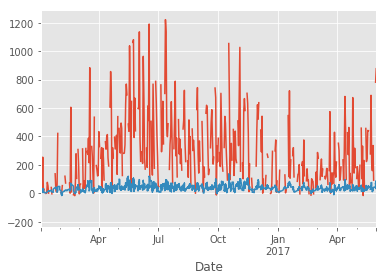

In [26]:
df = pd.read_csv('data/shovels 2016-01-01 to 2017-05-31 simple.csv',parse_dates=True,index_col=0)

df_qty = df['Qty'].resample('1D').sum() #gets true volume over 1 days

### 100 day moving average
# min_periods=0...if NaN it gives you average of what you have
df['60ma'] = df['Qty'].rolling(window=10, min_periods=0).mean()

df_qty.plot()
df['60ma'].plot()

plt.show()

In [ ]:
## this drops any rows that have NaN in them
df.dropna(inplace=True)
print(df.head())

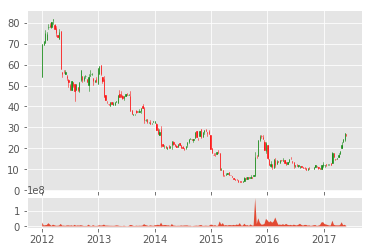

In [39]:
####------ combine data to make it 10 day data AND make candlesticks

df = pd.read_csv('data/wtw 2012 to 2017-05-30.csv',parse_dates=True,index_col=0)

df_ohlc = df['close'].resample('10D').ohlc() #gets avg value over 10 days
df_volume = df['volume'].resample('10D').sum() #gets true volume over 10 days

#make data columns format correct for candlestick plot
df_ohlc.reset_index(inplace=True) # reset index
df_ohlc['date'] = df_ohlc['date'].map(mdates.date2num) # correct date format for mdates





ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date() #display as beautiful dates

#add candlestick stuff and ax2 for better clarity
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0) #fill from 0 to y
plt.show()